## Jobs Reference:
The *tomato* job name is "`aiida-{CalcJobID}`".

E.g. for `190822_Aurora_9 formation`, it will be "`aiida-240`".

**LIST OF JOBS:**
```
* 190822_Aurora_9 formation
CalcJob:             <240> '190822_Aurora_9-formation'
Sample:              190822_Aurora_9

* 190822_Aurora_9 cycling
Monitored CalcJob:   <254> '190822_Aurora_9-cycling'
Monitor CalcJob:     <285> '190822_Aurora_9-cycling-monitor'
Sample:              190822_Aurora_9

* 190822_Aurora_9 discharge
CalcJob:             <270> '190822_Aurora_9-discharge'
Sample:              190822_Aurora_9

* 190822_Aurora_11 formation
CalcJob:             <243> '190822_Aurora_11-formation'
Sample:              190822_Aurora_11

* 190822_Aurora_11 cycling
Monitored CalcJob:   <258> '190822_Aurora_11-cycling'
Monitor CalcJob:     <287> '190822_Aurora_11-cycling-monitor'
Sample:              190822_Aurora_11

* 190822_Aurora_11 discharge
CalcJob:             <271> '190822_Aurora_11-discharge'
Sample:              190822_Aurora_11

* 190822_Aurora_12 formation
CalcJob:             <245> '190822_Aurora_12-formation'
Sample:              190822_Aurora_12

* 190822_Aurora_12 cycling
Monitored CalcJob:   <262> '190822_Aurora_12-cycling'
Monitor CalcJob:     <289> '190822_Aurora_12-cycling-monitor'
Sample:              190822_Aurora_12

* 190822_Aurora_12 discharge
CalcJob:             <272> '190822_Aurora_12-discharge'
Sample:              190822_Aurora_12

* 190822_Aurora_15 formation
CalcJob:             <307> '190822_Aurora_15-formation'
Sample:              190822_Aurora_15

* 190822_Aurora_15 cycling
Monitored CalcJob:   <309> '190822_Aurora_15-cycling'
Monitor CalcJob:     <332> '190822_Aurora_15-cycling-monitor'
Sample:              190822_Aurora_15

* 190822_Aurora_15 discharge
CalcJob:             <313> '190822_Aurora_15-discharge'
Sample:              190822_Aurora_15

* 190822_Aurora_16 formation
CalcJob:             <316> '190822_Aurora_16-formation'
Sample:              190822_Aurora_16

* 190822_Aurora_16 cycling
Monitored CalcJob:   <317> '190822_Aurora_16-cycling'
Monitor CalcJob:     <334> '190822_Aurora_16-cycling-monitor'
Sample:              190822_Aurora_16

* 190822_Aurora_16 discharge
CalcJob:             <322> '190822_Aurora_16-discharge'
Sample:              190822_Aurora_16
```

## Results Analysis

In [1]:
import numpy as np
import json
import pickle

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# for jupyter-lab:
#%matplotlib widget

# for jupyter notebook:
%matplotlib notebook
# or
#%matplotlib inline

Load pickle file with data

In [2]:
# BASE_DIR = '/home/aiida/data'
BASE_DIR = '/mnt/d/Documents/EPFL/Aurora/Aurora_data_D2'

In [3]:
with open(f'{BASE_DIR}/cycling_data.pkl', 'rb') as f:
    cycl_data = pickle.load(f)

In [4]:
cycl_data.keys()

dict_keys(['190822_Aurora_9', '190822_Aurora_11', '190822_Aurora_12', '190822_Aurora_15', '190822_Aurora_16'])

Each key contains an array of 3 dictionaries, in order:
 - formation
 - cycling
 - discharge

In [5]:
# this will be the cycling
cycl_data['190822_Aurora_16'][1].keys()

dict_keys(['time', 'Ewe', 'I', 'cn', 'time-cycles', 'Qd', 'Qc'])

I have already computed the capacity (`Qd` or `Qc`), using this function:

In [6]:
def get_capacity(t, I):
    # find indices of sign changes in I
    idx = np.where(np.diff(np.sign(I)) != 0)[0]

    # integrate and store charge and discharge currents
    Qc, Qd = [], []
    for ii in range(len(idx) - 1):
        i0, ie = idx[ii], idx[ii+1]
        q = np.trapz(I[i0:ie], t[i0:ie])
        if q > 0:
            Qc.append(q)
        else:
            Qd.append(abs(q))
    Qc = np.array(Qc)
    Qd = np.array(Qd)
    return Qc, Qd

For example:

In [24]:
Qc, Qd = get_capacity(cycl_data['190822_Aurora_16'][1]['time'], cycl_data['190822_Aurora_16'][1]['I'])

Since the time is expressed in seconds and the current in Ampere, the capacity should be `A * s = C`.
To convert it to `mAh` I simply divide by 3.6, correct?

<IPython.core.display.Javascript object>


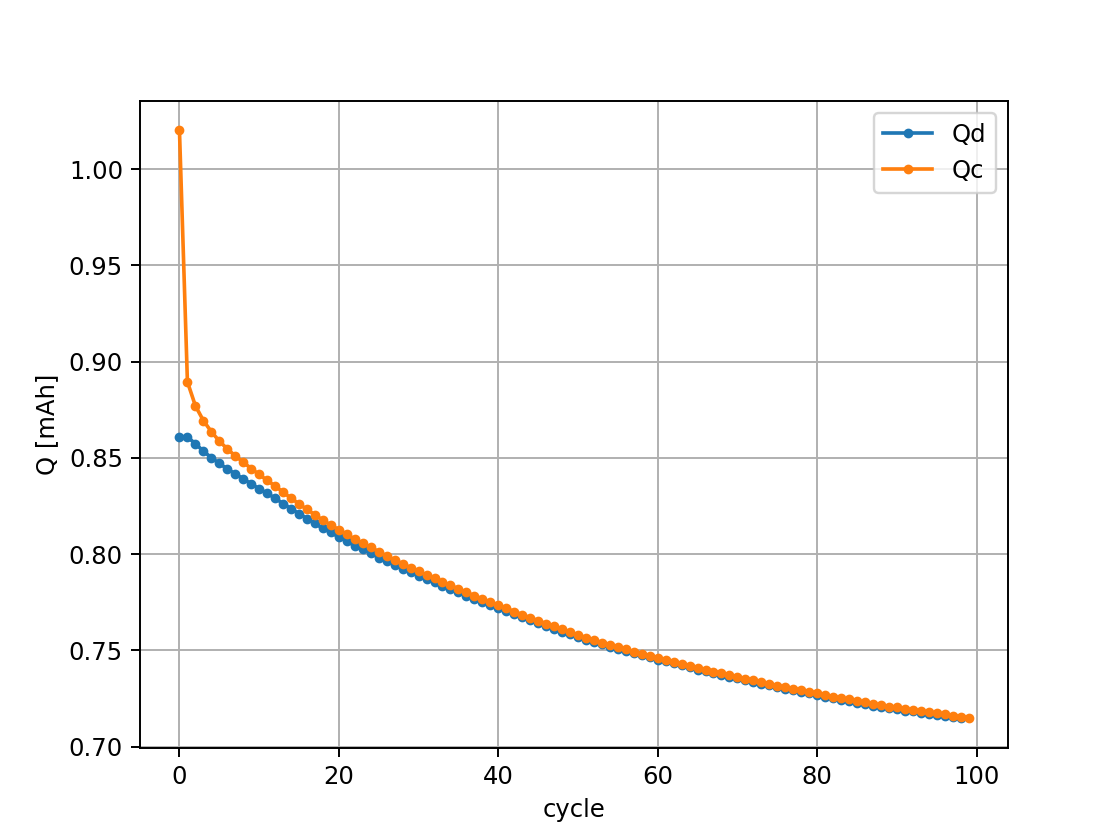

In [25]:
plt.figure()
plt.plot(Qd / 3.6, '.-', label='Qd')
plt.plot(Qc / 3.6, '.-', label='Qc')
plt.ylabel('Q [mAh]')
plt.xlabel('cycle')
plt.grid()
plt.legend();

## PLOTS

In [15]:
def plot_Ewe_I(data, name):
    f, ax = plt.subplots(3, figsize=(9,12))
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.05, top=0.95)
    for (i, axx), lab1, lab2 in zip(enumerate(ax), ['(a)', '(b)', '(c)'], ['[pretreatment]', '[cycling - monitored]', '[discharge]']):
        axx.plot(data[i]["time"] / 3600., data[i]["Ewe"], label='Ewe')
        axx.set_xlabel('t [h]')
        axx.set_ylabel('Ewe [V]', c='b')
        axx.text(0.985, 0.96, lab1, transform=axx.transAxes, ha='right', va='top', fontsize=12)
        axx.text(0.01, 1.015, lab2, transform=axx.transAxes, ha='left', va='bottom', fontsize=12)

        ax2 = axx.twinx()
        ax2.plot(data[i]["time"] / 3600, data[i]["I"] * 1000., 'r--', label='I')
        ax2.set_ylabel('I [mA]', c='r')
    f.suptitle(name);
    plt.savefig(f'{BASE_DIR}/{name}_Ewe_I.png', dpi=300)

<IPython.core.display.Javascript object>


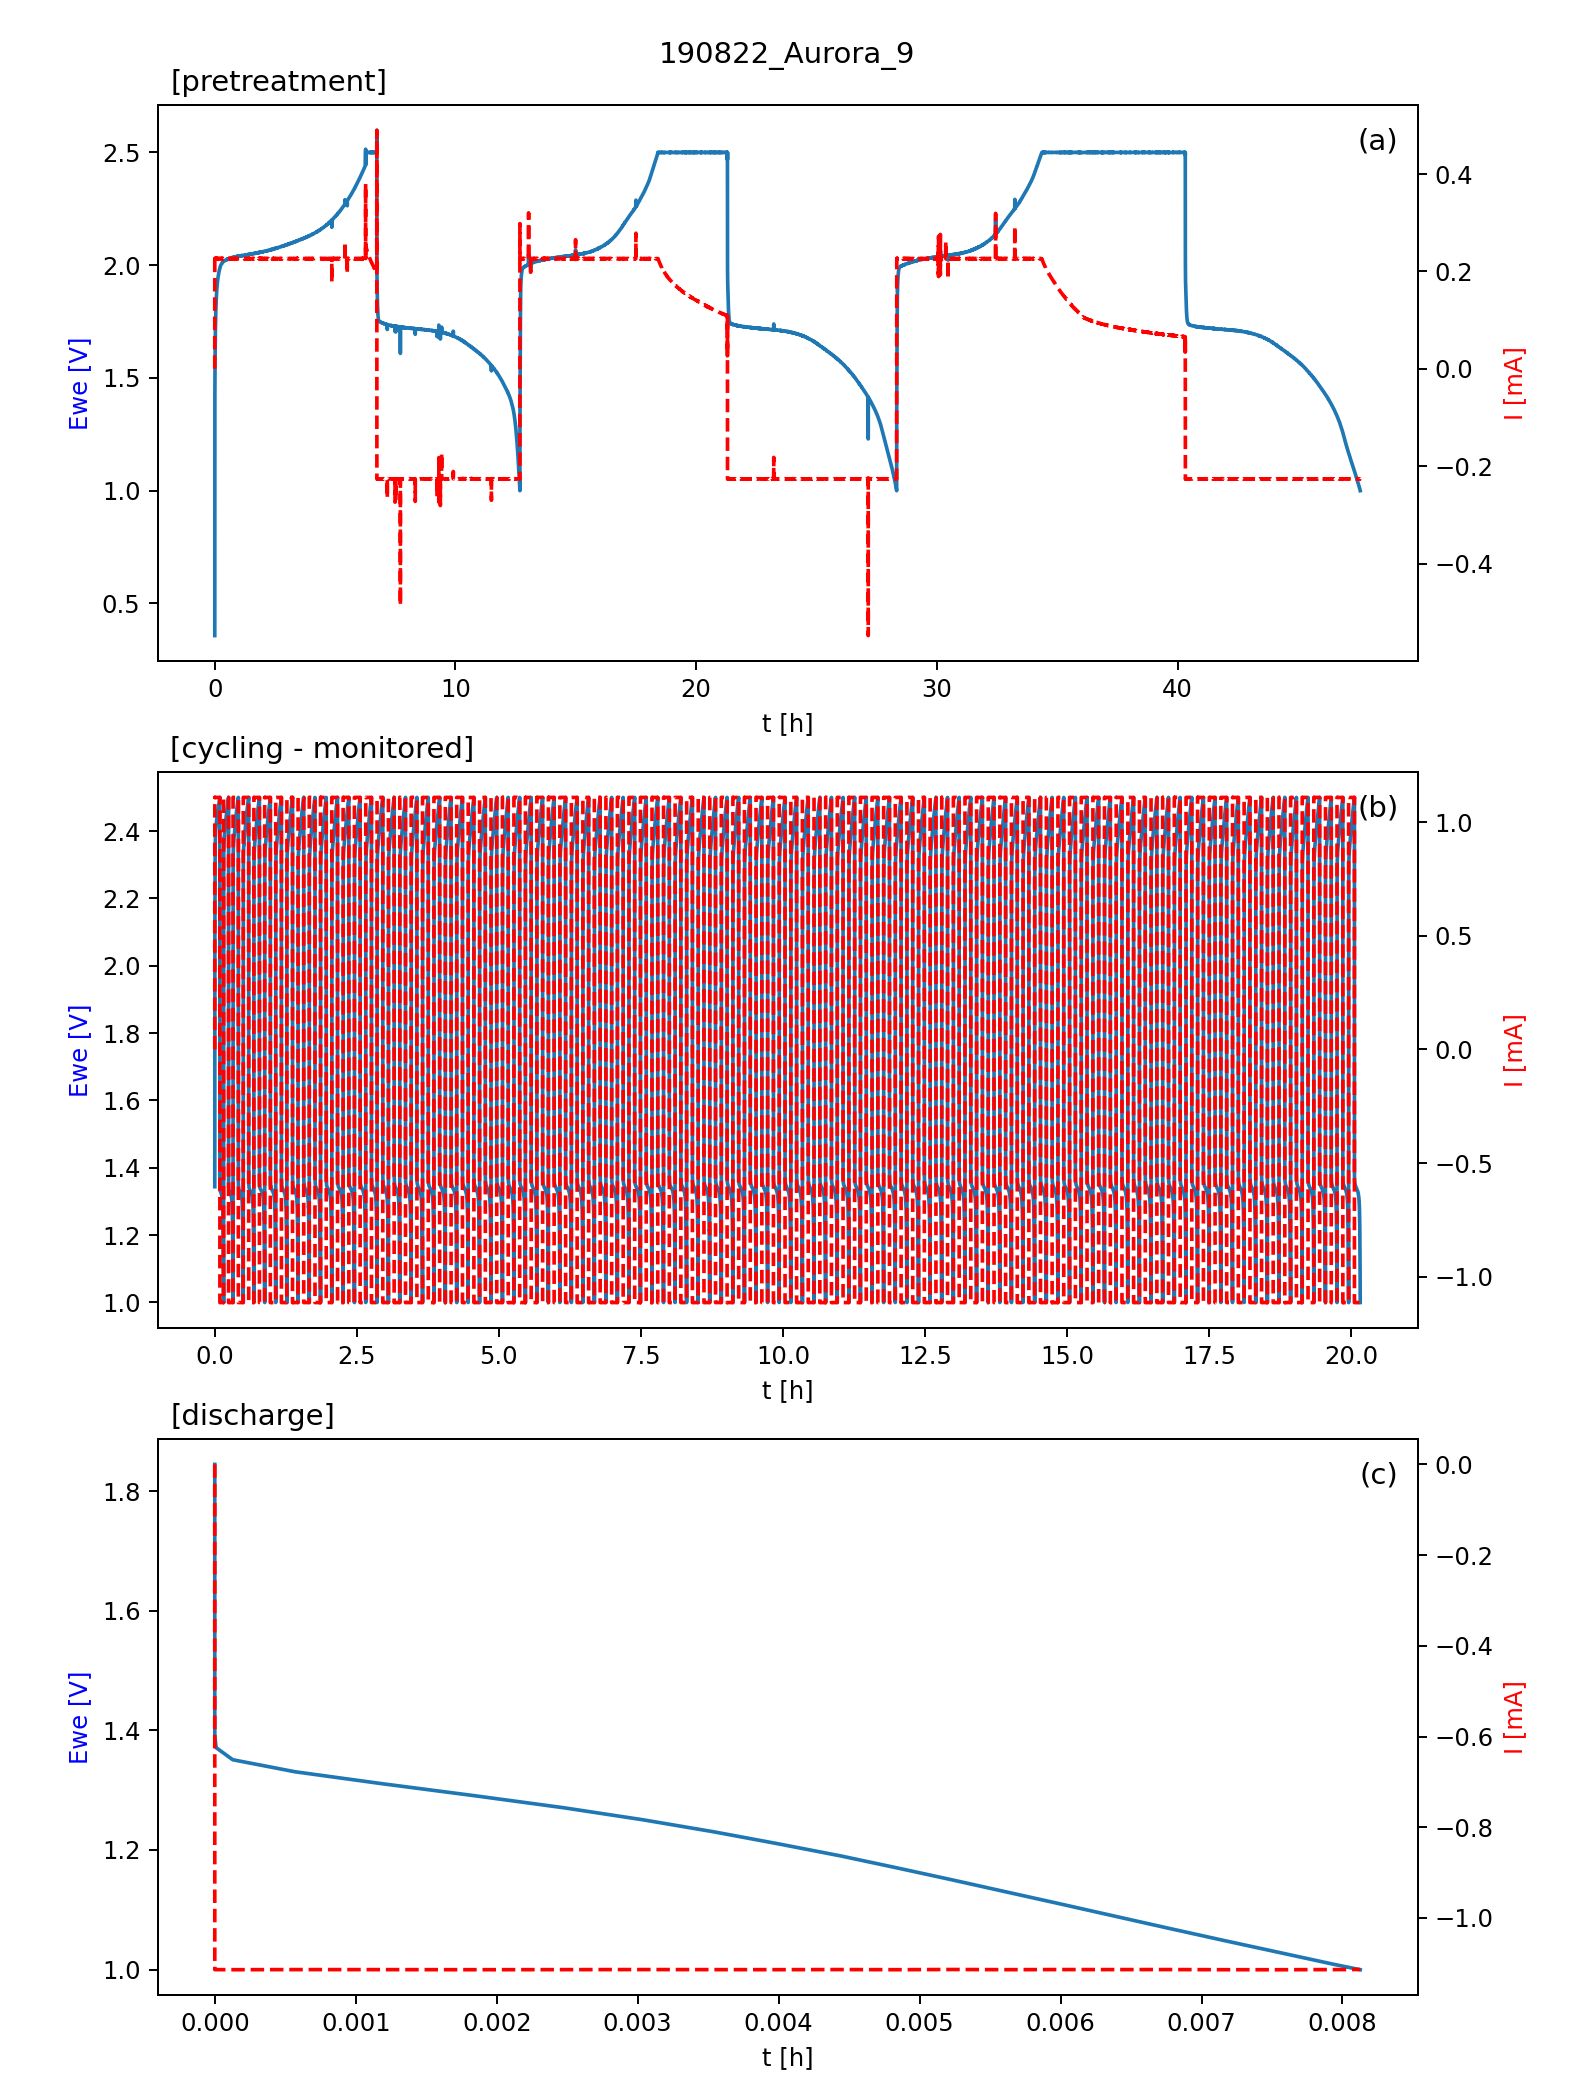

<IPython.core.display.Javascript object>


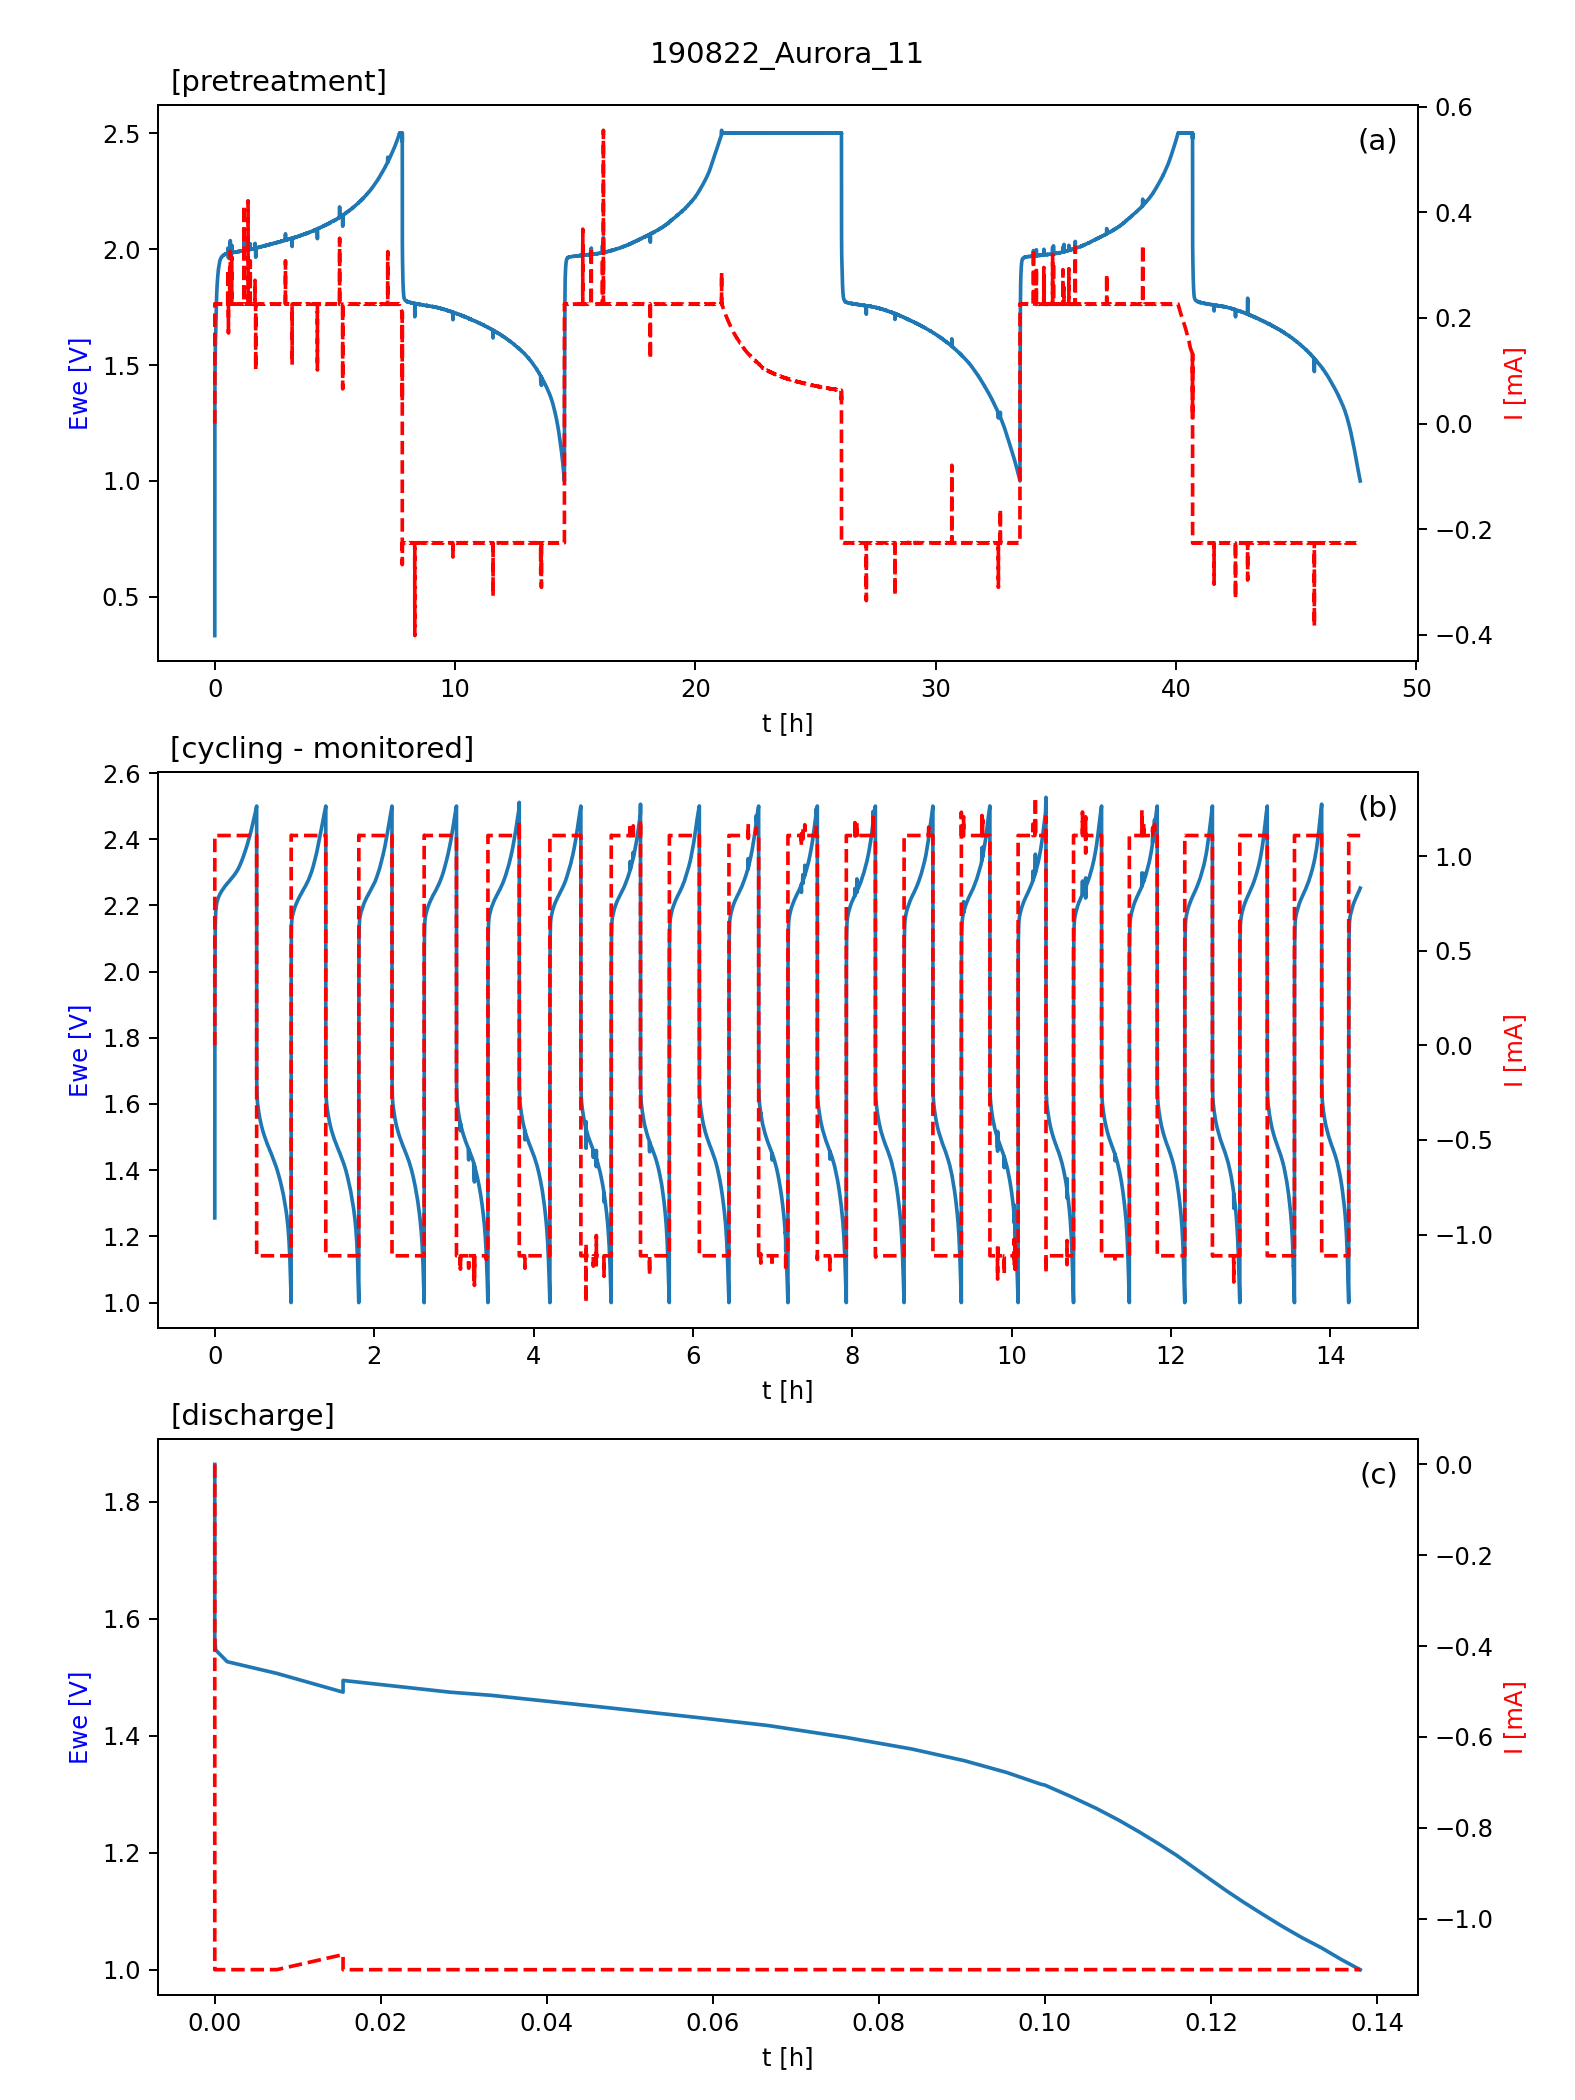

<IPython.core.display.Javascript object>


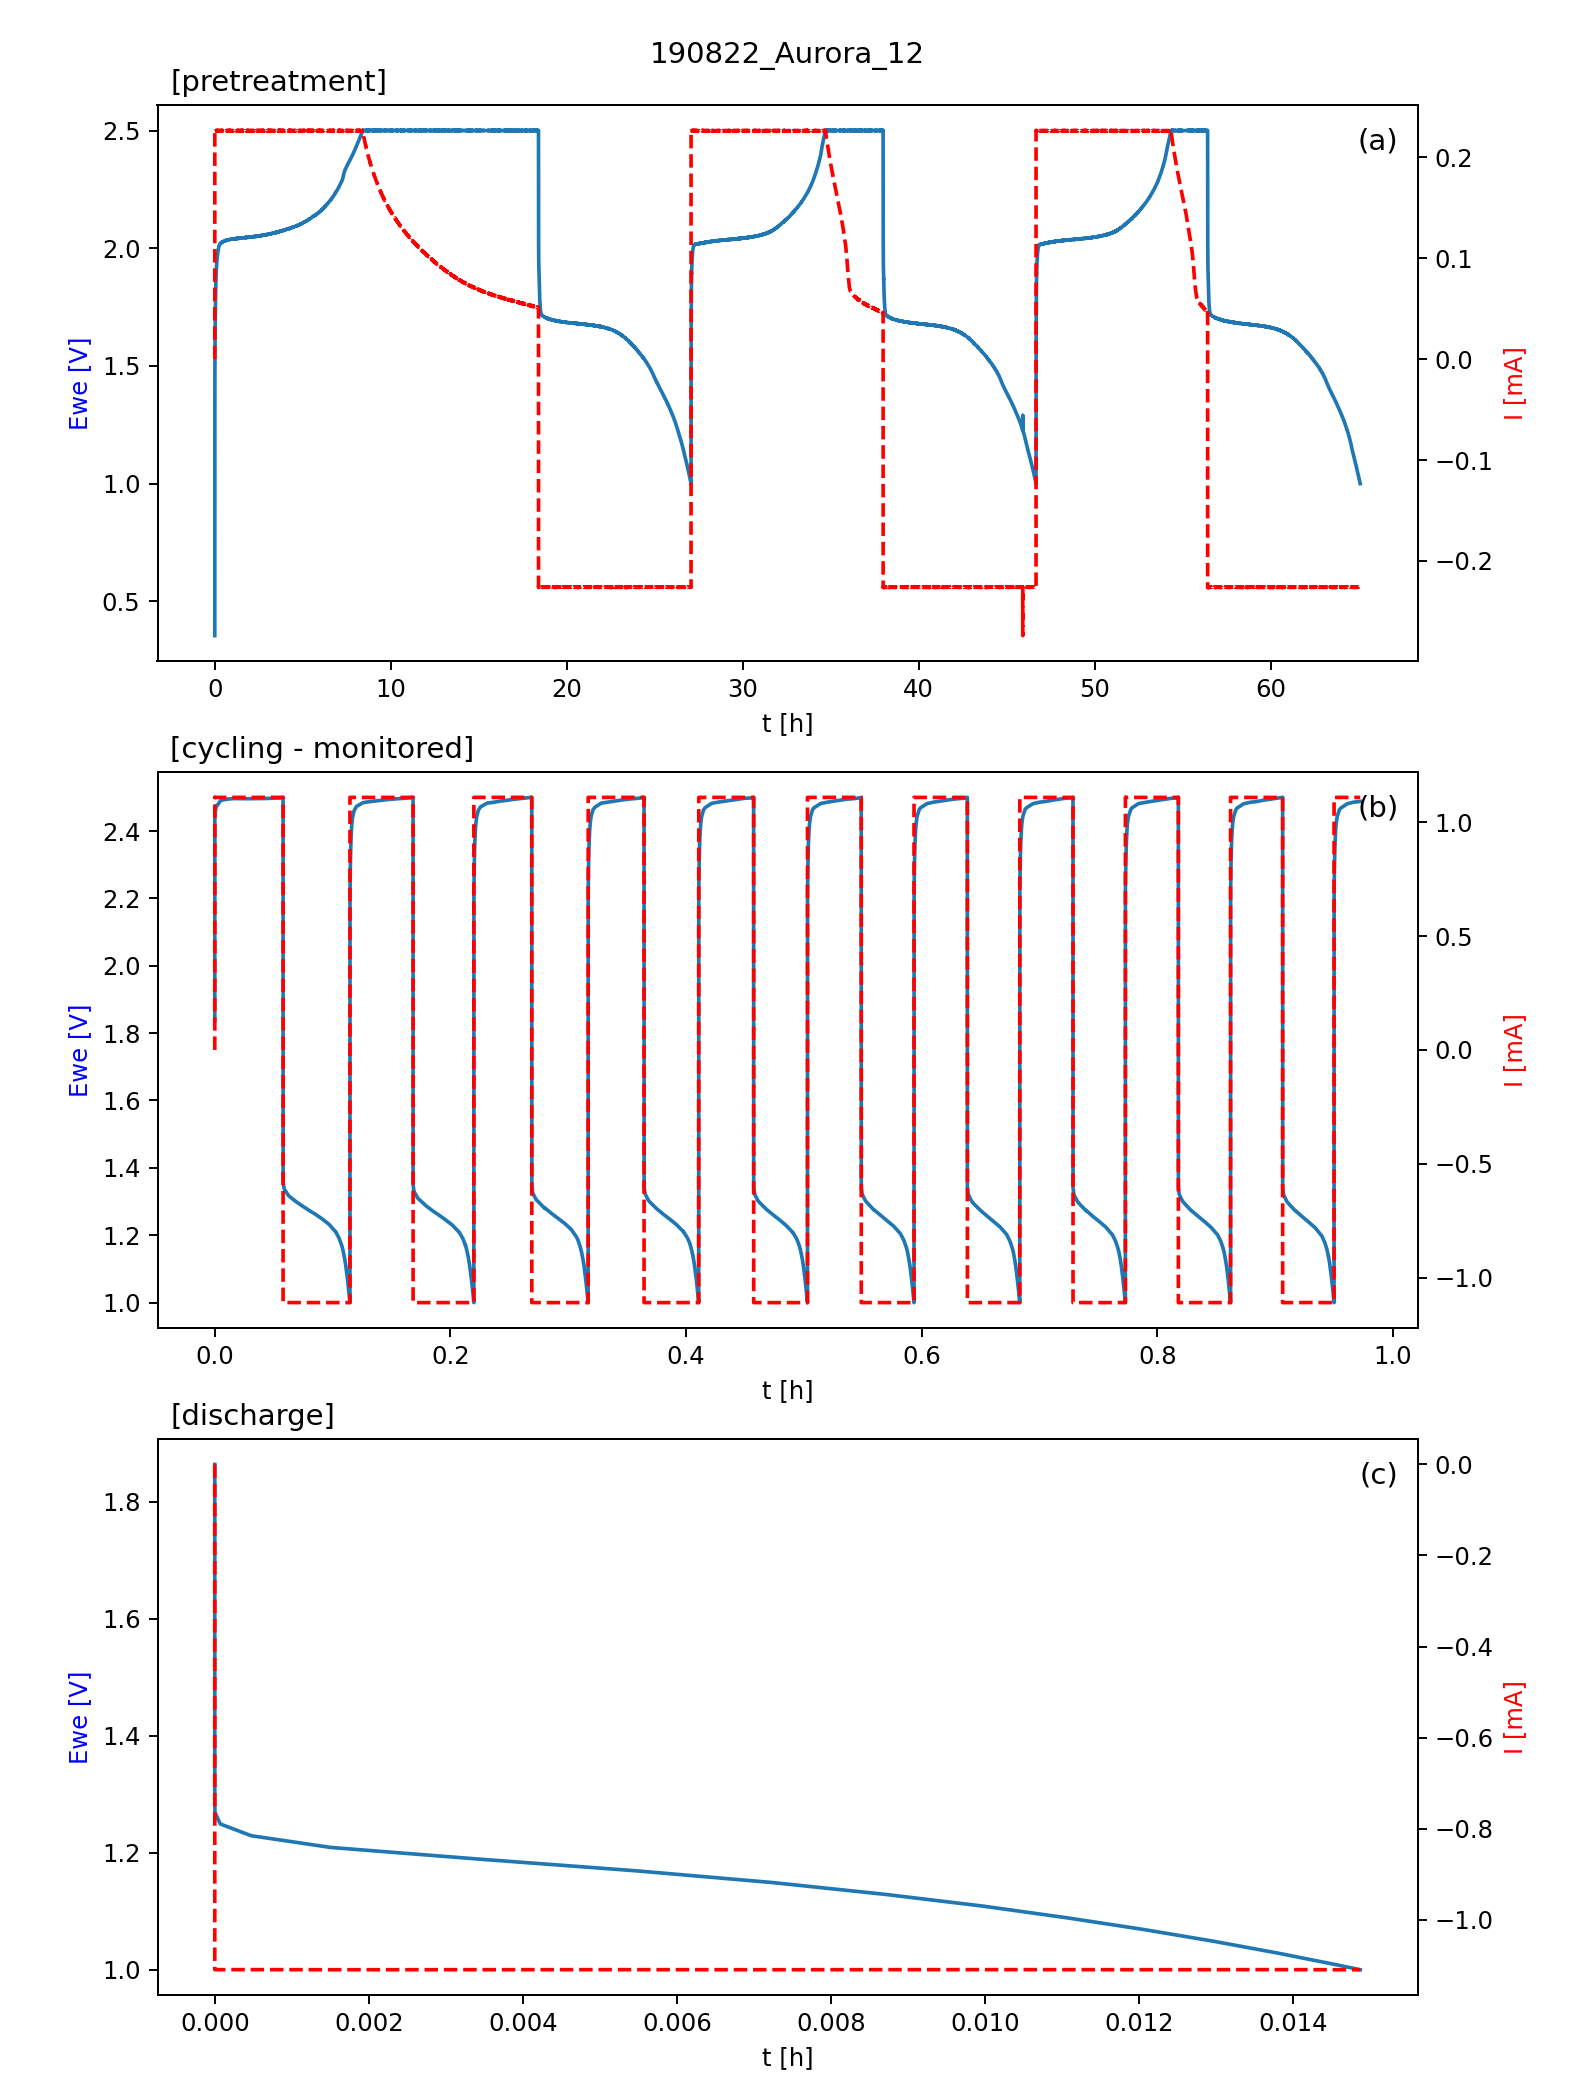

<IPython.core.display.Javascript object>


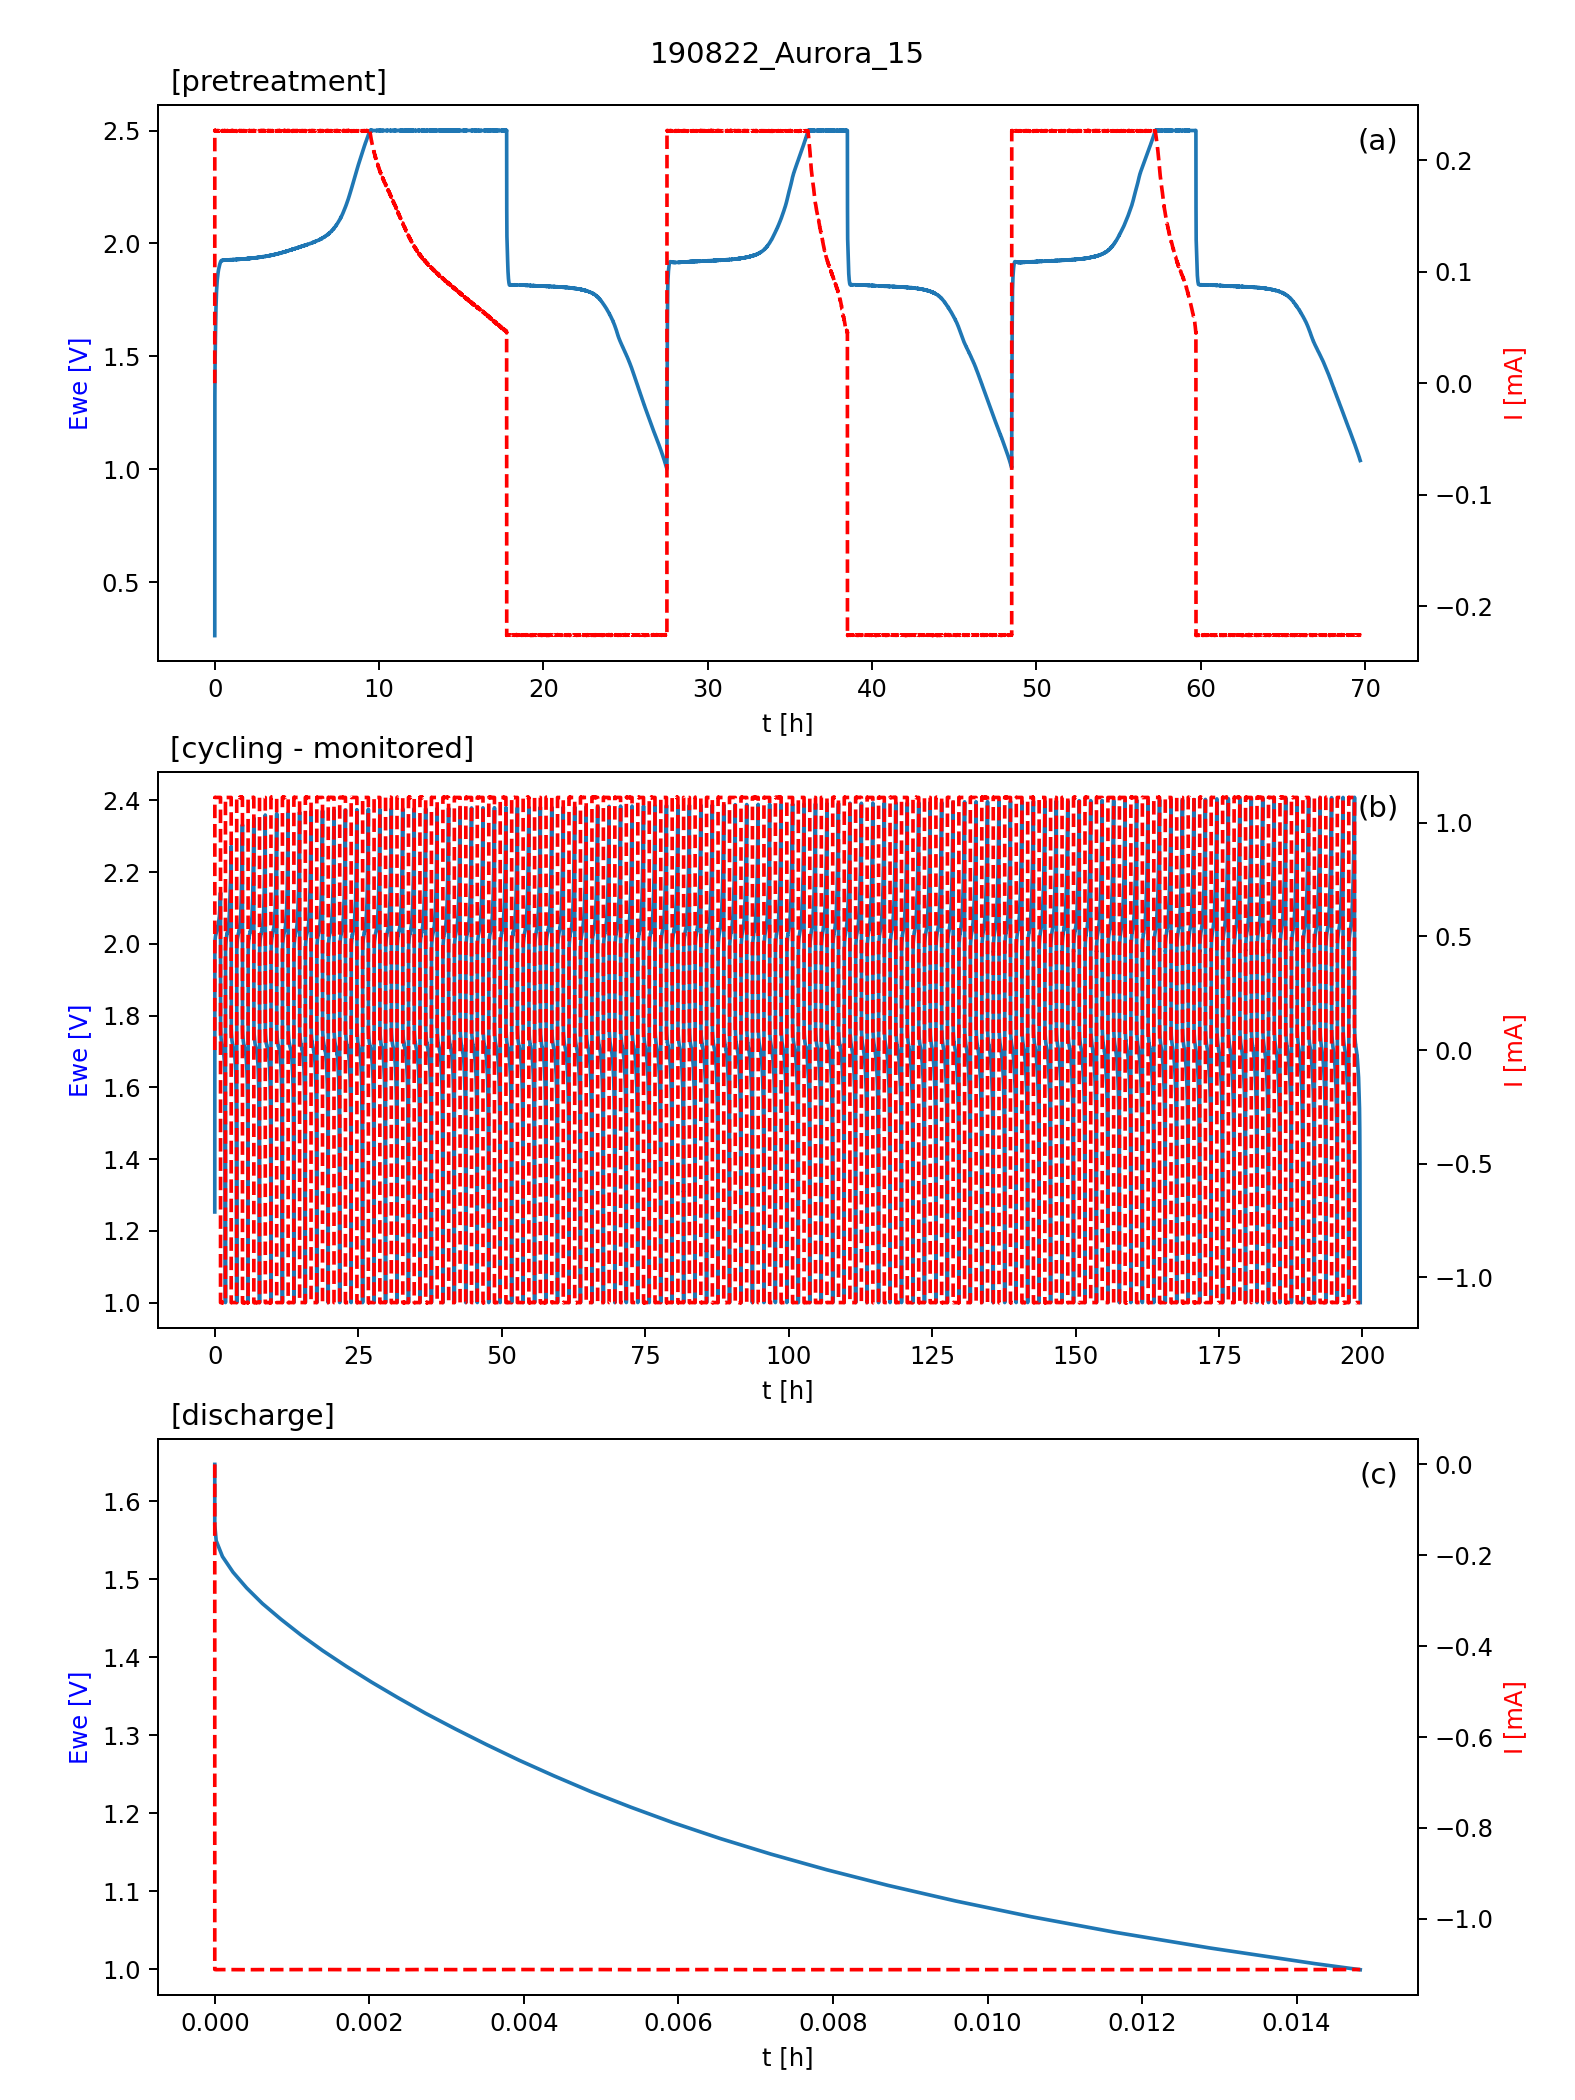

<IPython.core.display.Javascript object>


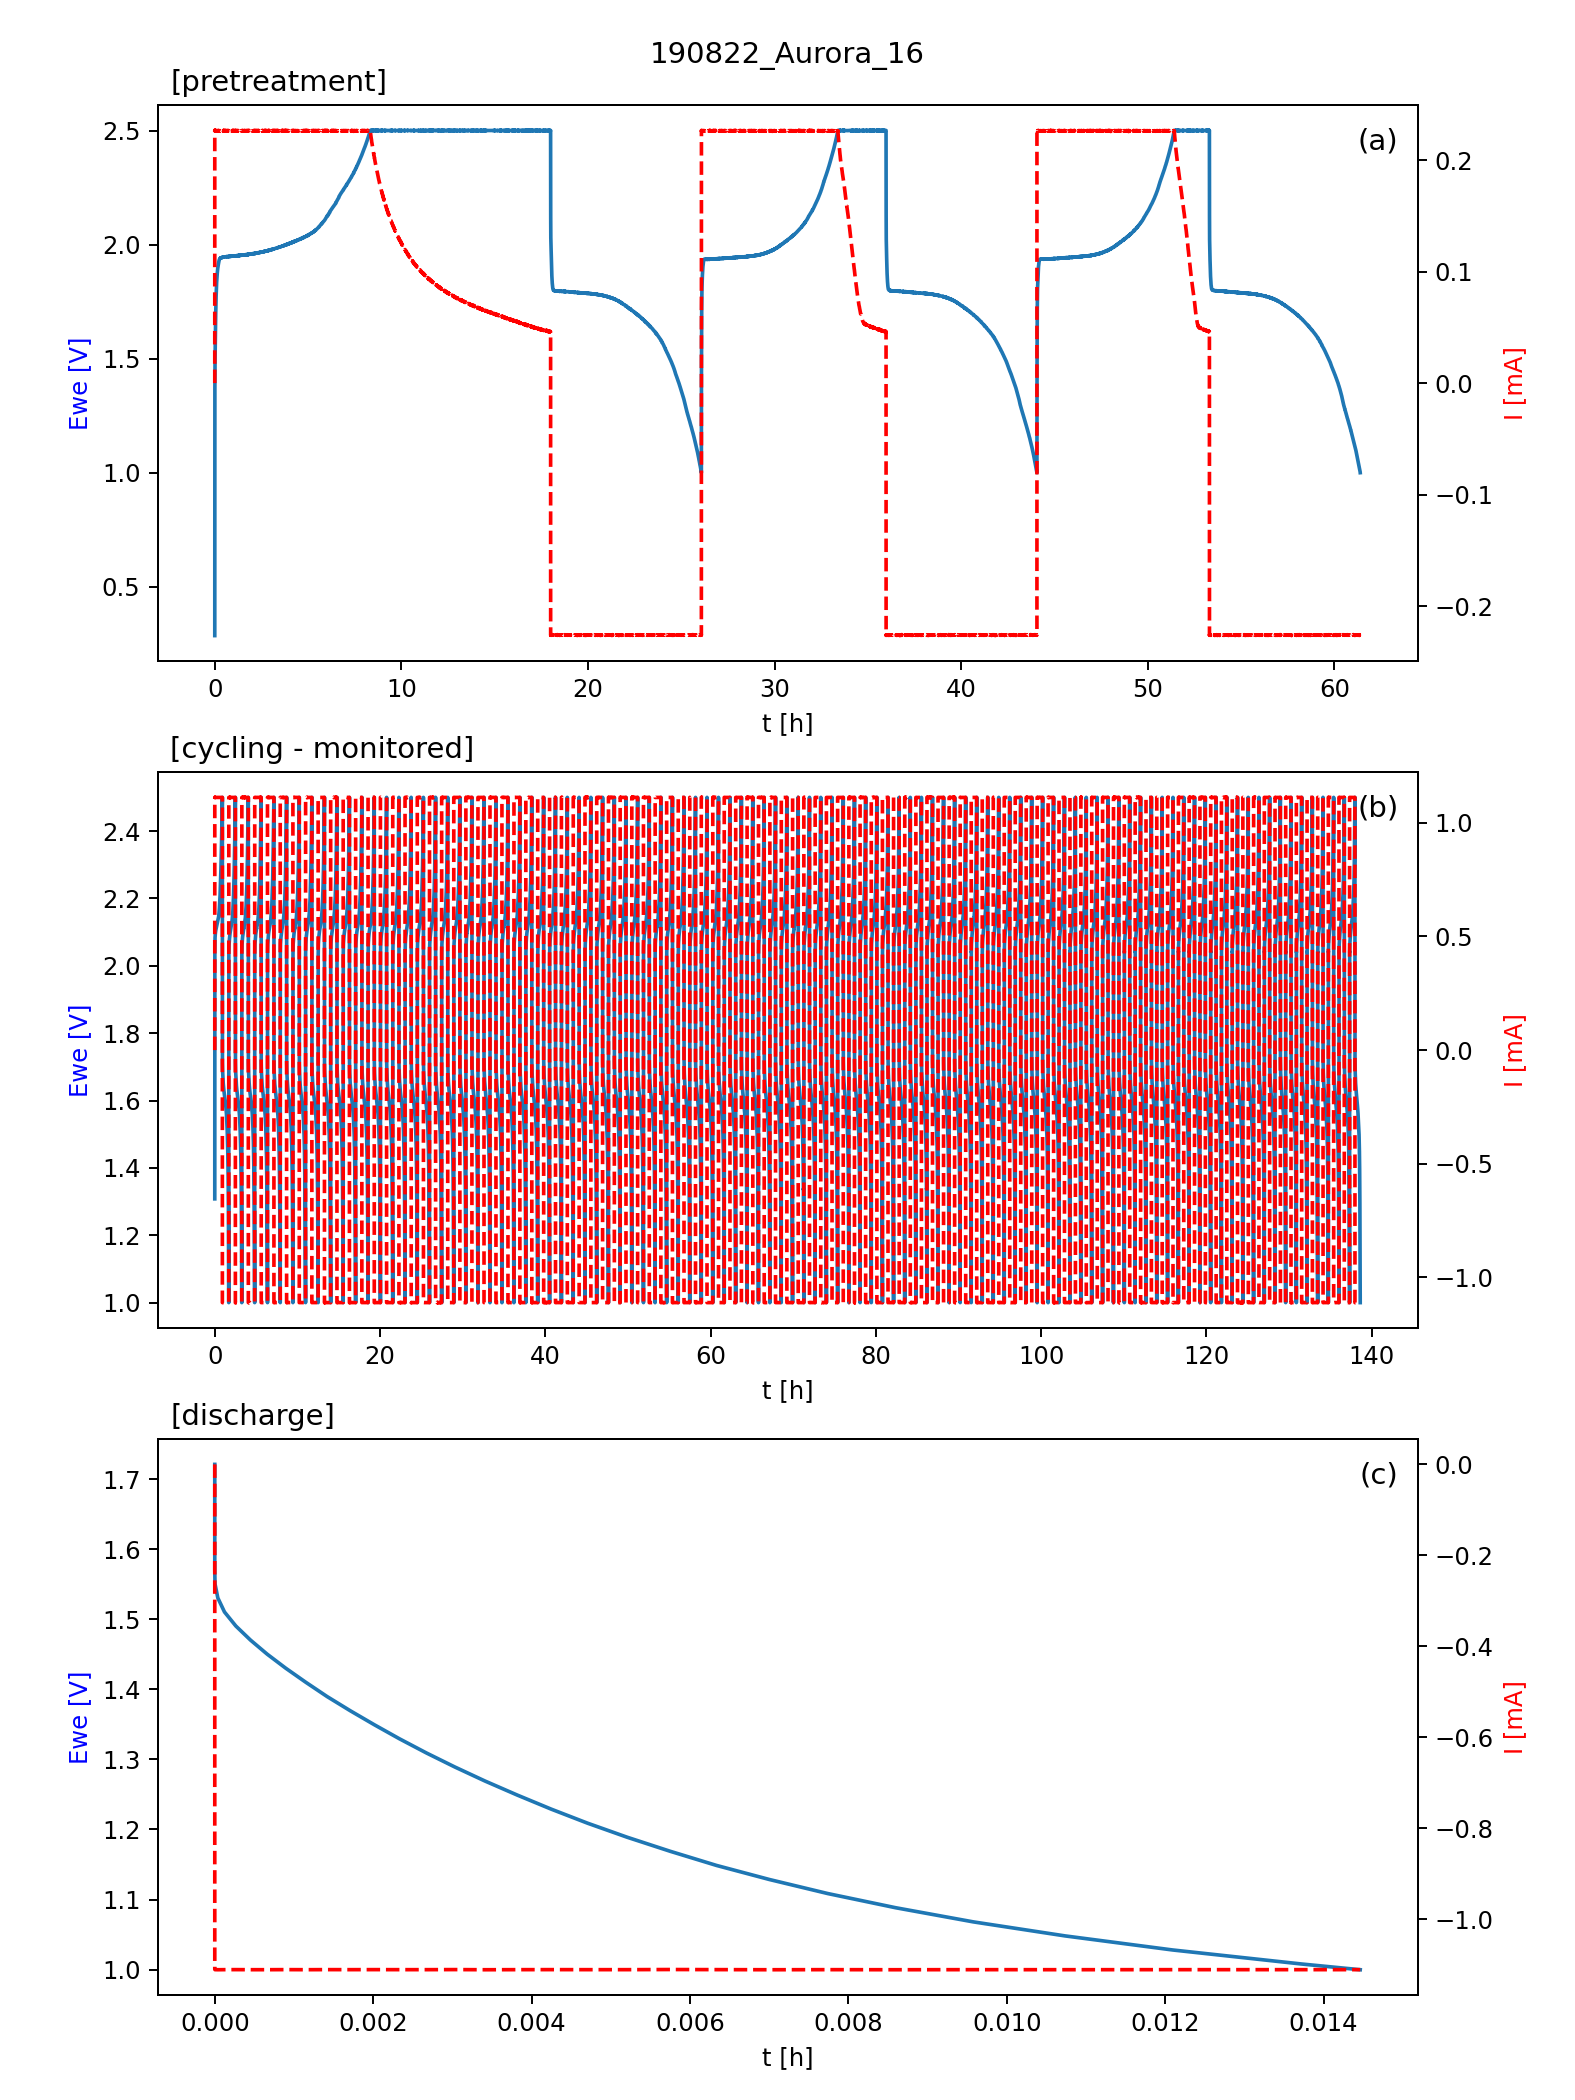

In [16]:
for name, data in cycl_data.items():
    plot_Ewe_I(data, name)

In [18]:
def plot_Qd(data, name, ytick=0.05):
    f, axx = plt.subplots(1, figsize=(9,4))
    plt.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.9)
    axx.plot(range(1, len(data[1]['Qd']) + 1), data[1]['Qd'] / 3.6, '.-', label='Qd')
    axx.set_xlabel('cycle')
    axx.set_ylabel('Qd [mAh]')
    axx.axhline(data[1]['Qd'][0] * 0.8 / 3.6, ls='--', c='r')
    if len(data[1]['Qd']) < 20:
        axx.xaxis.set_minor_locator(MultipleLocator(1))
        axx.xaxis.set_major_locator(MultipleLocator(2))
    else:
        axx.xaxis.set_minor_locator(MultipleLocator(5))
        axx.xaxis.set_major_locator(MultipleLocator(10))
    axx.yaxis.set_minor_locator(MultipleLocator(ytick * 0.5))
    axx.yaxis.set_major_locator(MultipleLocator(ytick))
    axx.set_xlim([0, None])
    axx.text(0.99, 0.96, '(d)', transform=axx.transAxes, ha='right', va='top', fontsize=12)
    f.suptitle(name);
    plt.savefig(f'{BASE_DIR}/{name}_Qd.png', dpi=300)

190822_Aurora_9 0.07388642472719655


<IPython.core.display.Javascript object>


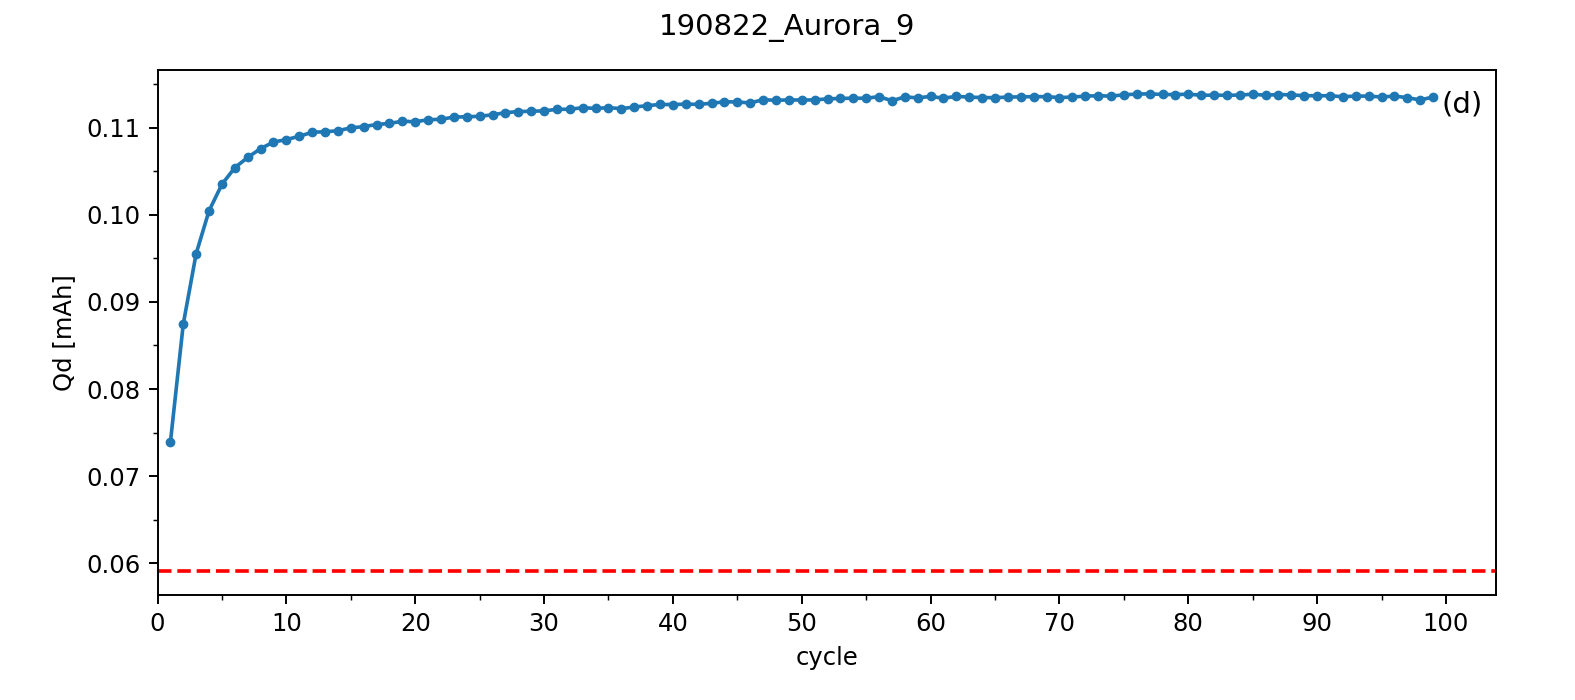

190822_Aurora_11 (killed by monitor) 0.481019629996178


<IPython.core.display.Javascript object>


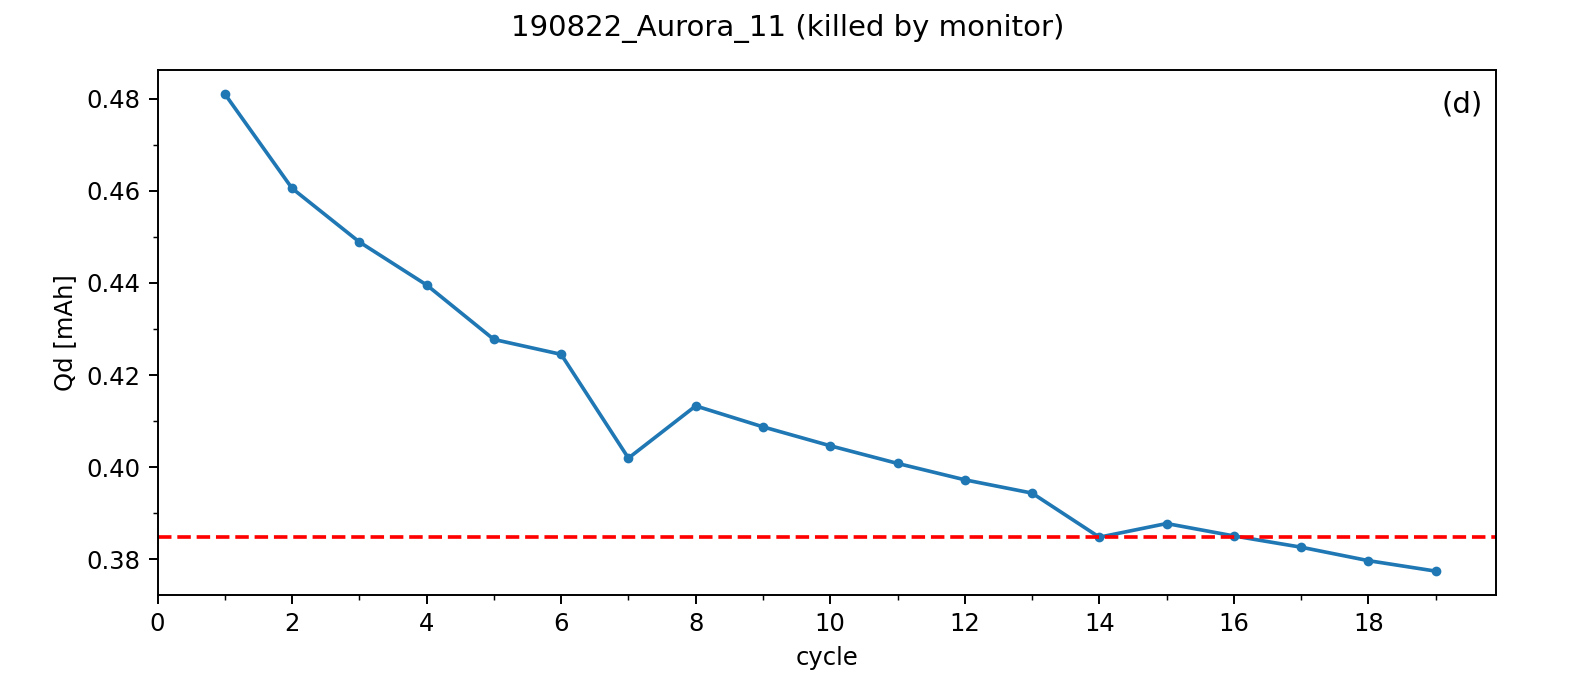

190822_Aurora_12 (killed by monitor) 0.06297643965170148


<IPython.core.display.Javascript object>


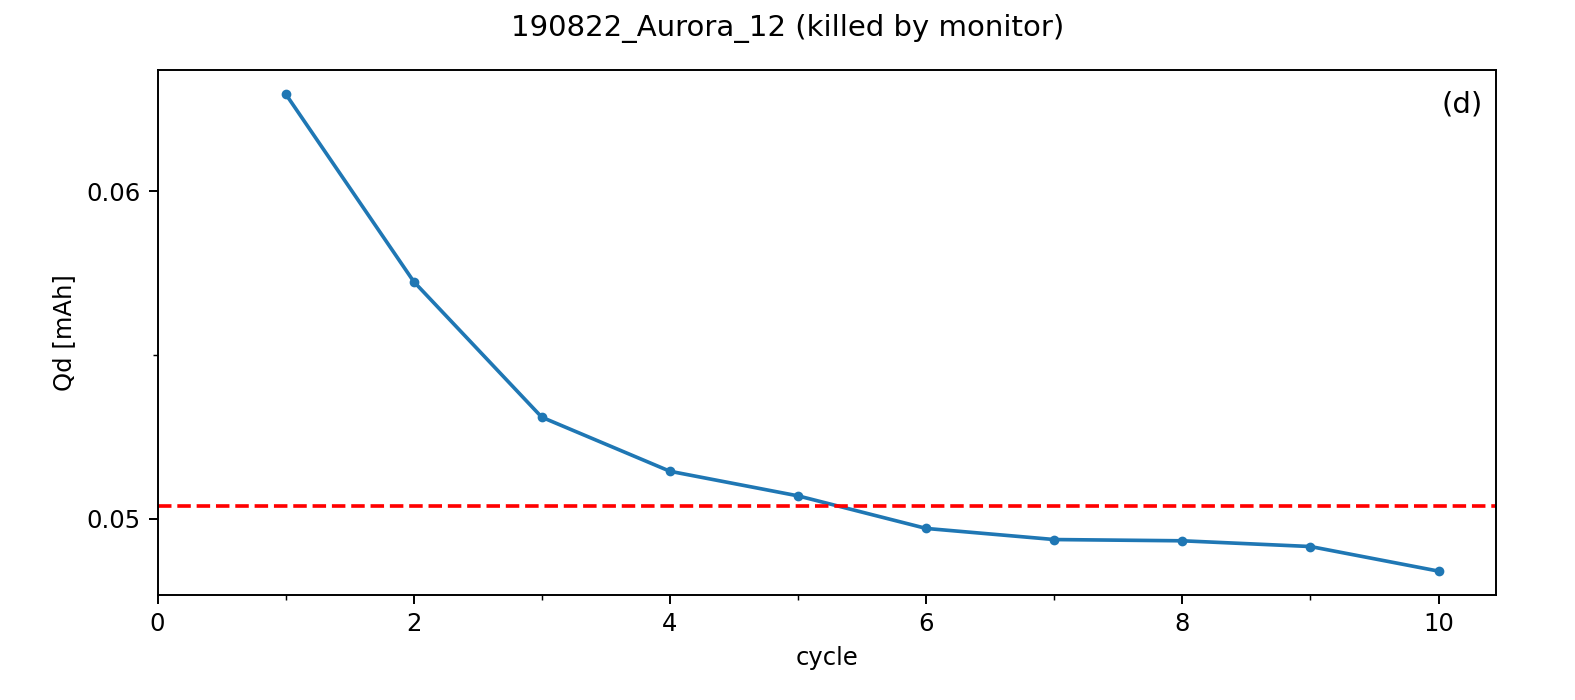

190822_Aurora_15 0.9548824468338082


<IPython.core.display.Javascript object>


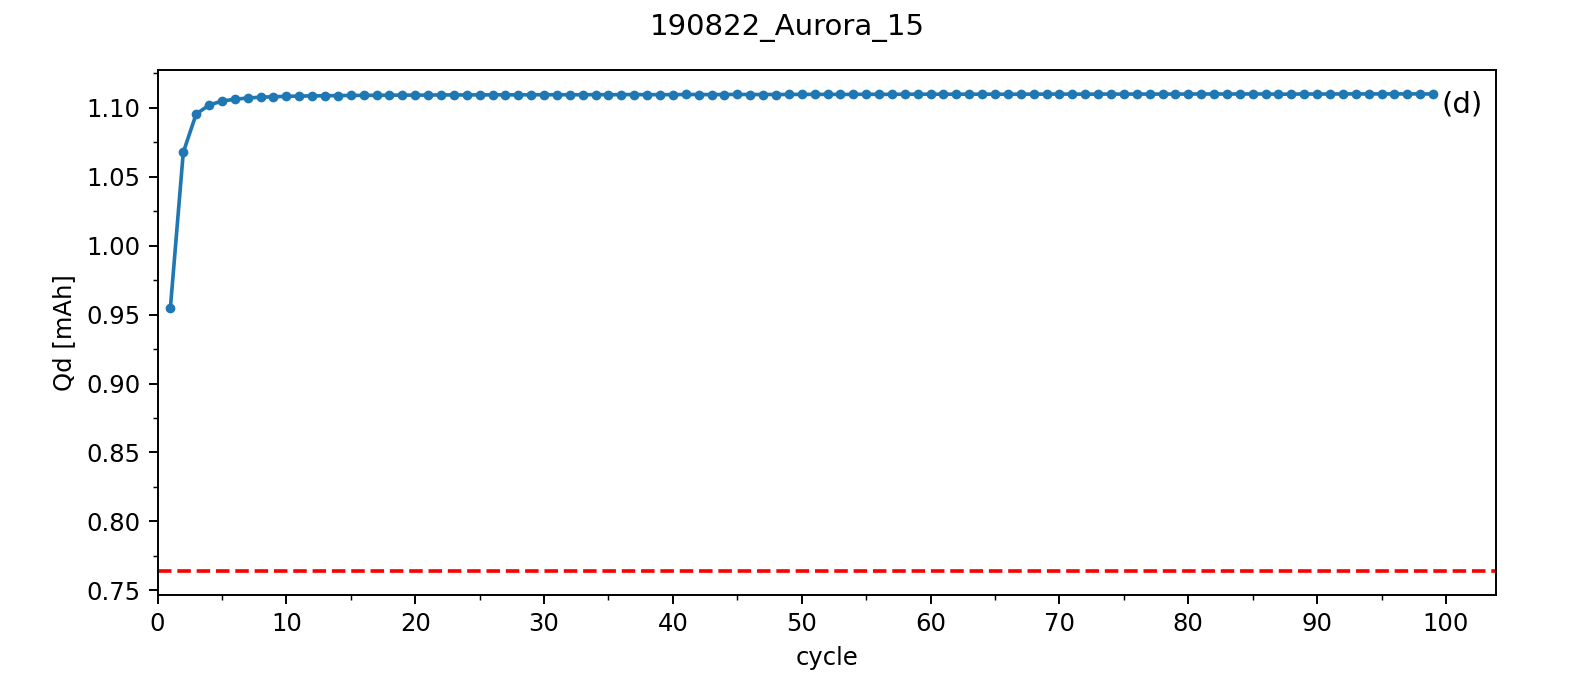

190822_Aurora_16 0.8610554203831539


<IPython.core.display.Javascript object>


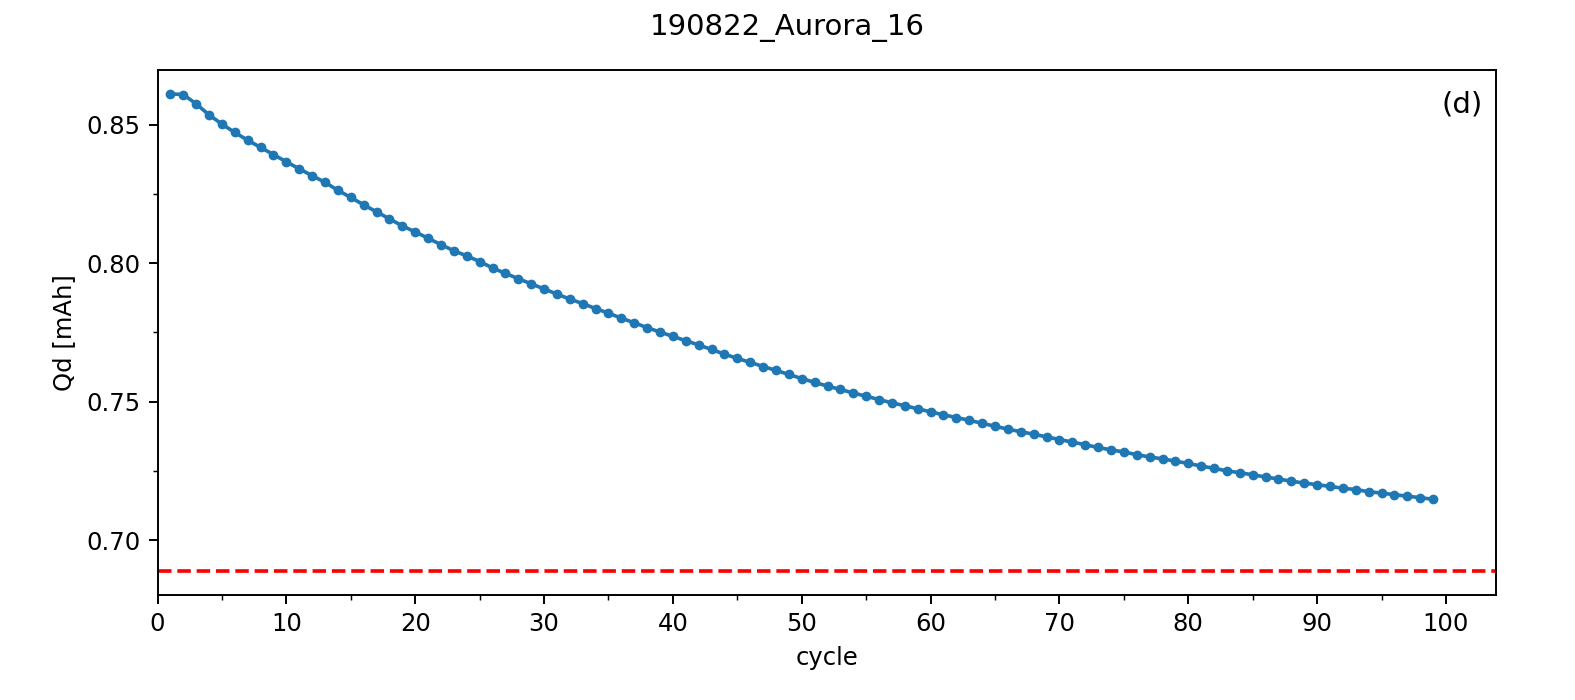

In [19]:
for (name, data), ytick in zip(cycl_data.items(), [0.01, 0.02, 0.01, 0.05, 0.05]):
    if '11' in name or '12' in name:
        name += ' (killed by monitor)'
    print(name, data[1]['Qd'][0] / 3.6)
    plot_Qd(data, name, ytick)